<a href="https://colab.research.google.com/github/Shiva83/Data-Analysis/blob/master/Personal_Loan_Purchase_probability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Context** \
This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with minimal budget.


**Objective**: \
The classification goal is to predict the likelihood of a liability customer buying personal loans.


Learning Outcomes: \
 Exploratory Data Analysis \
 Preparing the data to train a model\
 Training and making predictions using a classification model\
 Model evaluation

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

from sklearn.naive_bayes import BernoulliNB,GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [3]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Bank_Personal_Loan_Modelling-1.csv to Bank_Personal_Loan_Modelling-1.csv
User uploaded file "Bank_Personal_Loan_Modelling-1.csv" with length 211884 bytes


In [0]:
data = pd.read_csv('/content/Bank_Personal_Loan_Modelling-1.csv')

In [5]:
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


Here the PersonalLoan is Target feature


In [6]:
data.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [0]:
col_list = []
for i in data.columns:
   j=  i.replace(' ','')
   col_list.append(j.lower())

In [0]:
data.columns = col_list

In [9]:
print (data.personalloan.value_counts())
print (data.cdaccount.value_counts())

0    4520
1     480
Name: personalloan, dtype: int64
0    4698
1     302
Name: cdaccount, dtype: int64


The data distribution in each attribute

In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
zipcode,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
ccavg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
personalloan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


Avg of 9.6 percent have personal loans\
Avg of 10 percent have securities deposits\
Avg of 6 percent have certificate of deposit\
Avg of 50 percent are online users\
Avg of 29 percent have credit card




In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
id                   5000 non-null int64
age                  5000 non-null int64
experience           5000 non-null int64
income               5000 non-null int64
zipcode              5000 non-null int64
family               5000 non-null int64
ccavg                5000 non-null float64
education            5000 non-null int64
mortgage             5000 non-null int64
personalloan         5000 non-null int64
securitiesaccount    5000 non-null int64
cdaccount            5000 non-null int64
online               5000 non-null int64
creditcard           5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [0]:
sb.pairplot(data)

**Inference from the data distrubution**

Age and Experience are linearly correlated\
Age has normal distrubution\
Experience has normal distrubution\
Income has left skewed distrubution\
Zipcode attribute can be neglected\
Family attribute is categorical in nature and categories has count\
CCAvg has left skewed distrubution\
Mortuage has left skewed distrubution and linearly corelated with Income and CCAvg


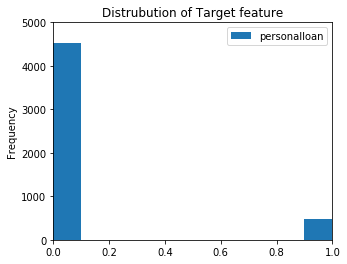

In [12]:
data.personalloan.plot(kind='hist',xlim=(0,1),ylim=(0,5000),title='Distrubution of Target feature',figsize=(5,4),legend='True')
plt.show()

Target feature Comments \
Out of 5000 only 480 opted for Personal loan which around 9.6% \
Data distrubution is skewed having very low data for personal loan opted may impact the model outcome\
i.e even if we say nobody opted for personal loan without executing the model probability of not opting for personal loan can be around 90%

In [0]:
X = data.drop(columns='personalloan',axis=1)
y = data.personalloan

In [15]:
X.head()

,id,age,experience,income,zipcode,family,ccavg,education,mortgage,securitiesaccount,cdaccount,online,creditcard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1


Allocation Training and Testing set\
Training set has 70% data \
Test set has 30% data


In [0]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.30,random_state=500)

In [18]:
print (X_train.shape)
print (X_test.shape)

(3500, 13)
(1500, 13)


In [0]:
log_mdl = LogisticRegression()

In [22]:
log_mdl.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [38]:
log_mdl.predict_proba(X_test)[:3]

array([[0.98739469, 0.01260531],
       [0.99109145, 0.00890855],
       [0.98278913, 0.01721087]])

In [40]:
confusion_matrix(y_test,y_pred=log_mdl.predict(X_test))

array([[1303,   39],
       [ 107,   51]])

In [0]:
Knn_mdl = KNeighborsClassifier()

In [32]:
Knn_mdl.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [33]:
Knn_mdl.predict_proba(X_test)[:3]

array([[1. , 0. ],
       [0.8, 0.2],
       [0.8, 0.2]])

In [41]:
confusion_matrix(y_test,y_pred=Knn_mdl.predict(X_test))

array([[1341,    1],
       [ 156,    2]])

In [0]:
naive_mdl = BernoulliNB()

In [35]:
naive_mdl.fit(X_train,y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [36]:
naive_mdl.predict_proba(X_test)[:3]

array([[0.94425496, 0.05574504],
       [0.93875057, 0.06124943],
       [0.93875057, 0.06124943]])

In [42]:
confusion_matrix(y_test,y_pred=naive_mdl.predict(X_test))

array([[1304,   38],
       [ 134,   24]])

Graphical representation of all model performance- TODO

Give your reasoning on which is the best model
